In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data =pd.read_csv("/content/Student_Performance.csv")

In [ ]:
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data.shape

(10000, 6)

In [ ]:
data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
data.nunique()

,0
Hours Studied,9
Previous Scores,60
Extracurricular Activities,2
Sleep Hours,6
Sample Question Papers Practiced,10
Performance Index,91


In [ ]:
data["Hours Studied"].value_counts()

,count
Hours Studied,
1,1152
6,1133
7,1129
3,1119
9,1115
5,1094
8,1088
4,1085
2,1085


In [ ]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
data.duplicated().sum()

np.int64(127)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(9873, 6)

In [ ]:
data.columns=[i.replace(' ','_') for i in data.columns]

In [ ]:
data.head(5)

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data["Extracurricular_Activities"]=data["Extracurricular_Activities"].map({"Yes":1,"No":0})

In [ ]:
data.head(5)

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


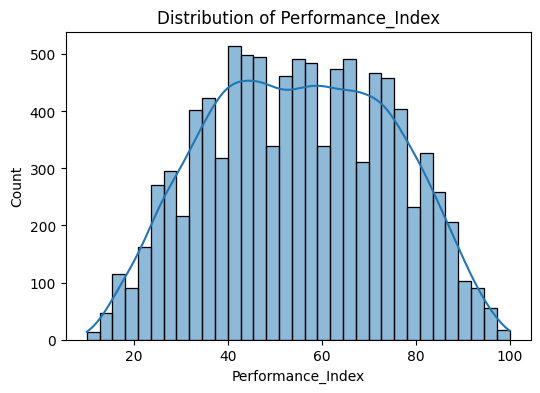

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data["Performance_Index"].dropna(), kde=True)
plt.title("Distribution of Performance_Index")
plt.xlabel("Performance_Index")
plt.show()

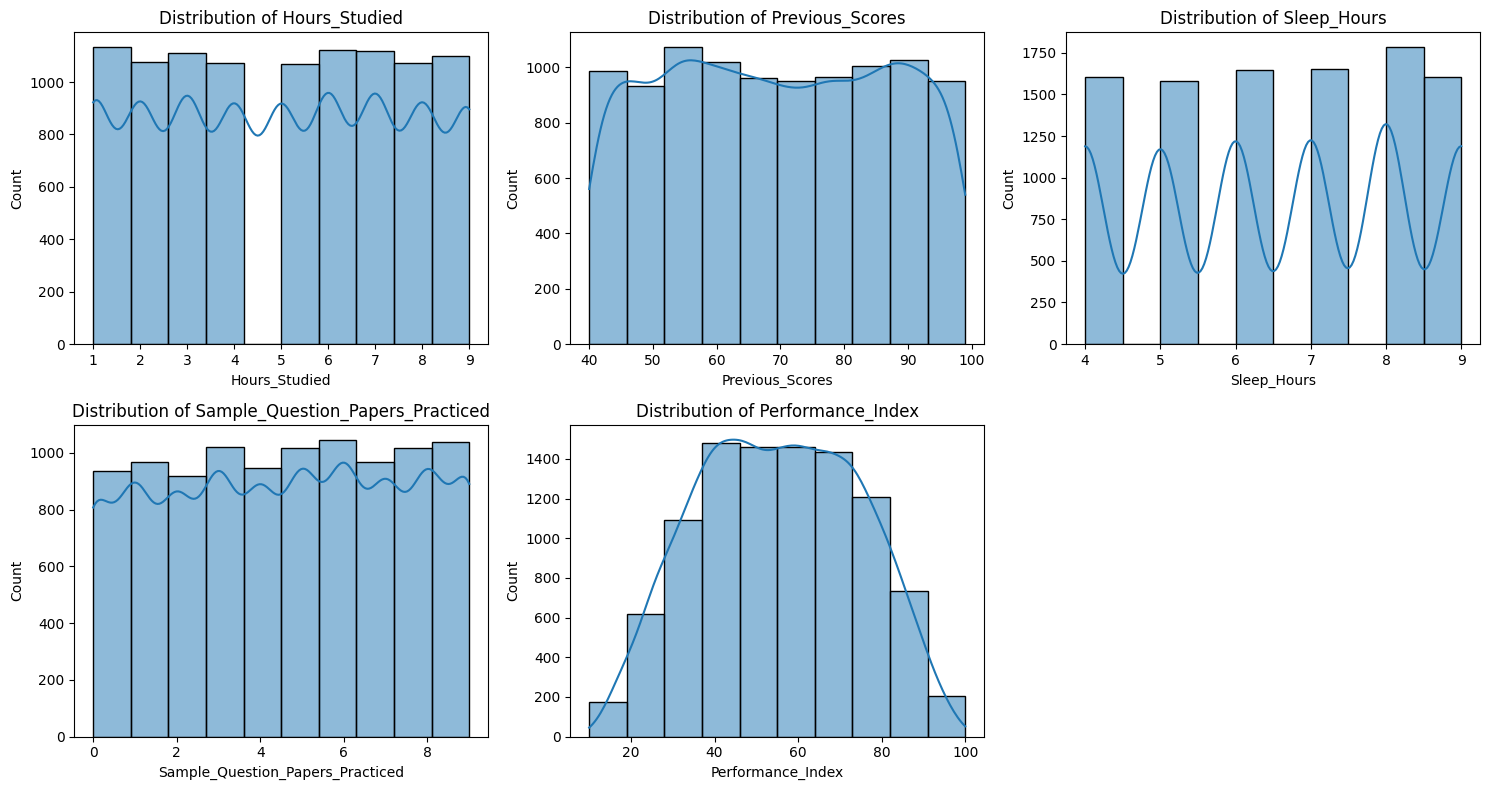

In [ ]:
numeric_cols = ["Hours_Studied", "Previous_Scores", "Sleep_Hours", "Sample_Question_Papers_Practiced", "Performance_Index"]

plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=10)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

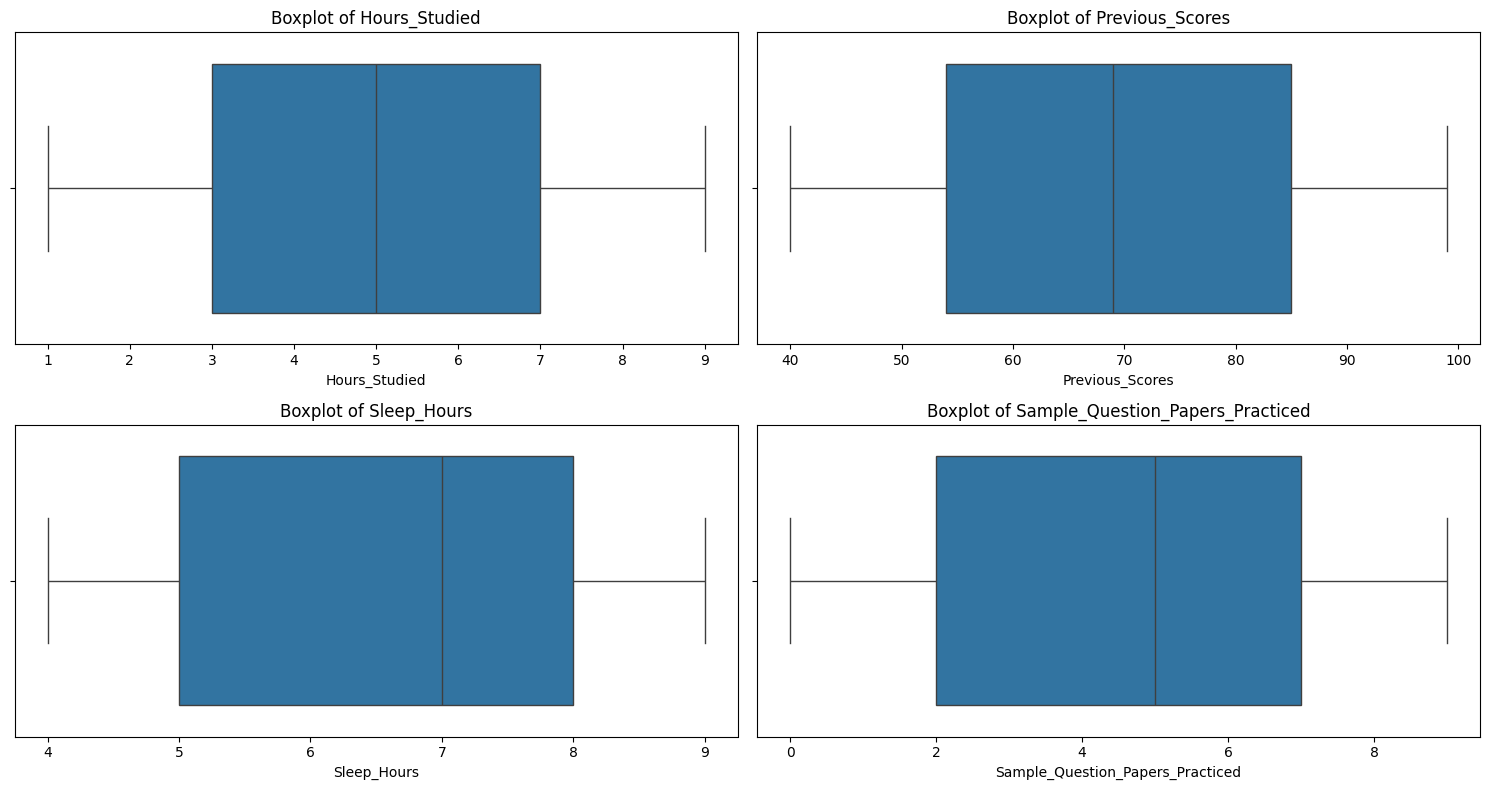

In [ ]:
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols[:-1], 1):  # exclude target
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

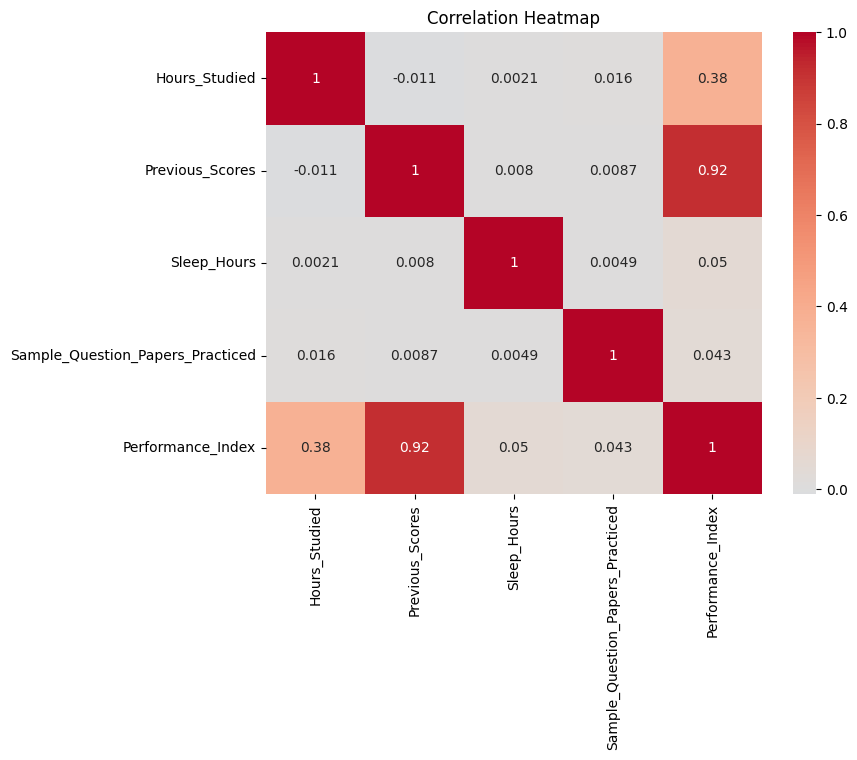

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

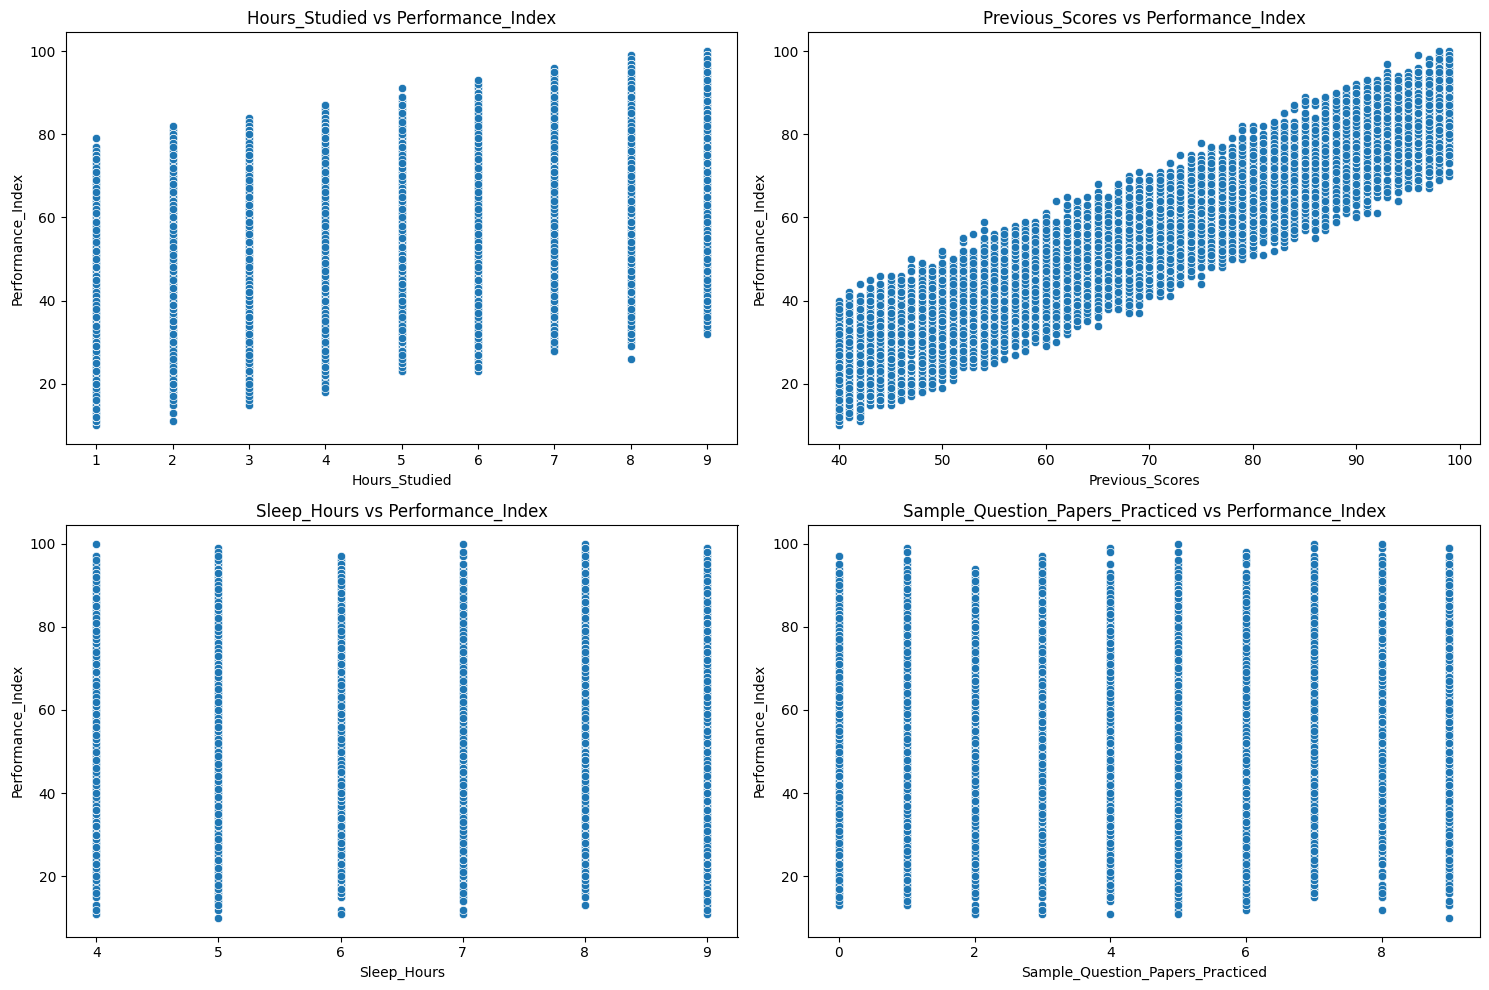

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols[:-1], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[col], y=data["Performance_Index"])
    plt.title(f"{col} vs Performance_Index")
plt.tight_layout()
plt.show()

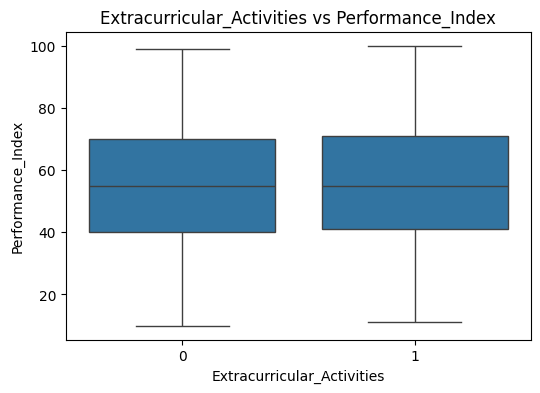

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Extracurricular_Activities", y="Performance_Index", data=data)
plt.title("Extracurricular_Activities vs Performance_Index")
plt.show()

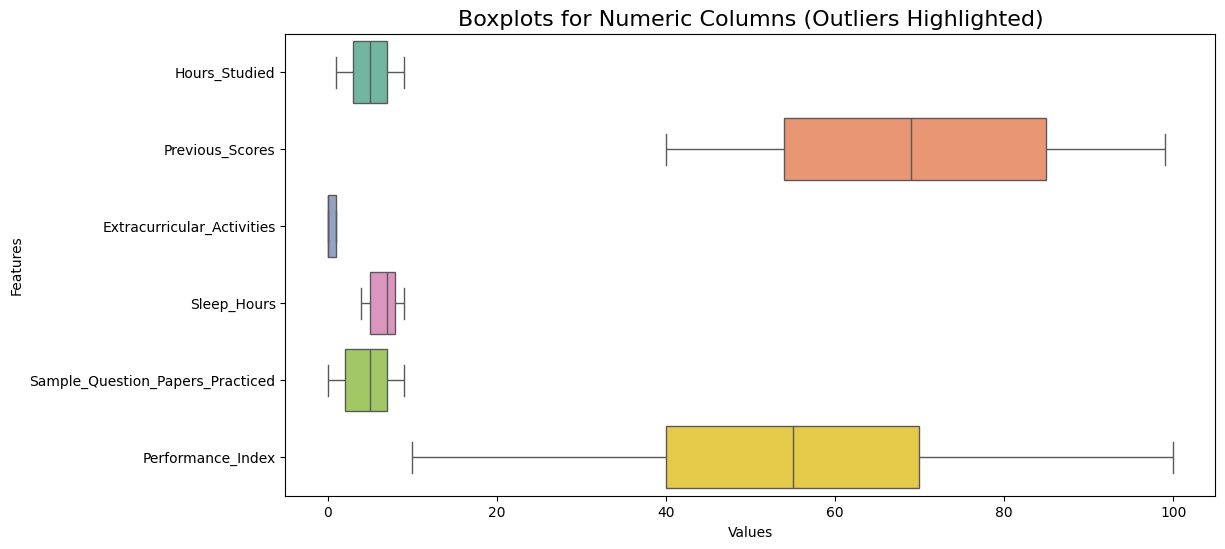

In [ ]:
#for box plot in a single chart
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h", palette="Set2")
# Add title and labels
plt.title("Boxplots for Numeric Columns (Outliers Highlighted)", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()


In [ ]:
X = data.drop(columns=["Performance_Index"])
Y = data["Performance_Index"]

In [ ]:
X.head()


,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [ ]:
Y.head()

,Performance_Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [ ]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape

(7898, 5)

In [ ]:
X_test.shape

(1975, 5)

In [ ]:
Y_train.shape

(7898,)

In [ ]:
data.describe()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["Hours_Studied", "Previous_Scores", "Sleep_Hours",
                "Sample_Question_Papers_Practiced"]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
X_train.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
8591,0.003721,0.096536,0,-1.497153,-0.208907
9120,-1.156282,-0.712663,1,0.268403,-1.257157
4112,-1.542949,-1.175062,0,-1.497153,-1.606574
811,-0.769614,-0.654863,1,-0.320116,-1.257157
6848,-0.769614,0.616735,0,0.856921,1.188761


In [ ]:
X_test.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
6099,-0.382947,-0.308064,1,-0.908634,0.140510
106,0.777056,1.194734,1,-1.497153,-1.257157
9265,0.390388,0.212135,1,-0.320116,-1.257157
4707,-0.769614,-1.521862,0,-0.320116,1.188761
2155,1.550391,0.385535,0,1.445440,1.188761


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [ ]:
#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_model(y_true, y_pred, dataset="Train"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

eval_model(Y_train, y_train_pred, "Train")
eval_model(Y_test, y_test_pred, "Test")

Train → RMSE: 2.04, MAE: 1.62, R²: 0.99
Test → RMSE: 2.08, MAE: 1.65, R²: 0.99
